In [5]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# reading the data

df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task one

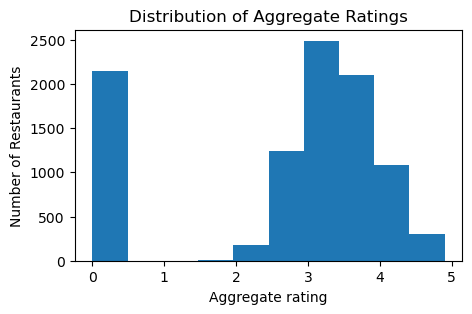

In [4]:
# distribution of aggregate ratings

plt.figure(figsize = (5,3))
plt.hist(df["Aggregate rating"], bins = 10)
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [5]:
# the most common rating range.

rating_range = pd.cut(df["Aggregate rating"], bins = 10)  #groups ratings to ranges
most_common_rating_range = rating_range.value_counts().idxmax()
print(f"The most common rating range is {most_common_rating_range}")

The most common rating range is (2.94, 3.43]


In [6]:
# average no. of votes recieved by restaurants

average_votes = df["Votes"].mean()
print(f"The average number of votes recieved by restaurants is {average_votes}")

The average number of votes recieved by restaurants is 156.909747670401


## Task two

In [7]:
# the most common combinations of cuisines
# fillna("") replaces missing values with empty string
# str.split(",") splits the cuisines to a list
# set(x) romoves dupliccates
# sorted(set(x)) sorts the cuisines
# tuple() converts to tuple to allow for grouping of the cuisines

df["cuisine_combo"] = (df["Cuisines"].fillna("").str.split(",").apply(lambda x: tuple(sorted(set(x)))))
common_combo = df["cuisine_combo"].value_counts().nlargest()
common_combo

(North Indian,)             936
( Chinese, North Indian)    511
(Chinese,)                  354
(Fast Food,)                354
( Mughlai, North Indian)    335
Name: cuisine_combo, dtype: int64

In [17]:
# determine if certain cuisine combinations tend to have higher ratings
# first we determine the average rating of each combination
# we identify those that have higher ratings than the most common cuisines

avg_combo_rating = df.groupby("cuisine_combo")["Aggregate rating"].mean()
higher_ratings = avg_combo_rating.nlargest()
higher_ratings

cuisine_combo
( American,  Healthy Food, Mexican)    4.9
( Asian,  Indian, European)            4.9
( BBQ,  Sandwich, American)            4.9
( Bakery,  Continental, Italian)       4.9
( Bar Food,  Steak, Burger)            4.9
Name: Aggregate rating, dtype: float64

## Task three

In [18]:
# plot locations of restaurants on a map with the use of longitude and latitude coordinates

# to plot the locations, the geopandas library will be used

In [4]:
#installing geopandas

!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
     ---------------------------------------- 6.1/6.1 MB 42.9 kB/s eta 0:00:00
  Using cached shapely-2.0.7-cp39-cp39-win_amd64.whl (1.4 MB)
     --------------------------------------- 15.9/15.9 MB 72.6 kB/s eta 0:00:00
     -------------------------------------- 16.2/16.2 MB 140.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [8]:
!pip install numpy==1.22

     --------------------------------------- 14.7/14.7 MB 39.1 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.0 which is incompatible.


In [14]:
import geopandas as gpd
from shapely.geometry import Point

In [16]:
#converting the dataframe into a geodataframe

#convert longitude and latitude to geometric points and pair longitude and latitude values
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]

#using geodataframe to store geospatial data and EPSG:4326 as coordinate reference system(crs)
gdf = gpd.GeoDataFrame(df, geometry = geometry, crs = "EPSG:4326")

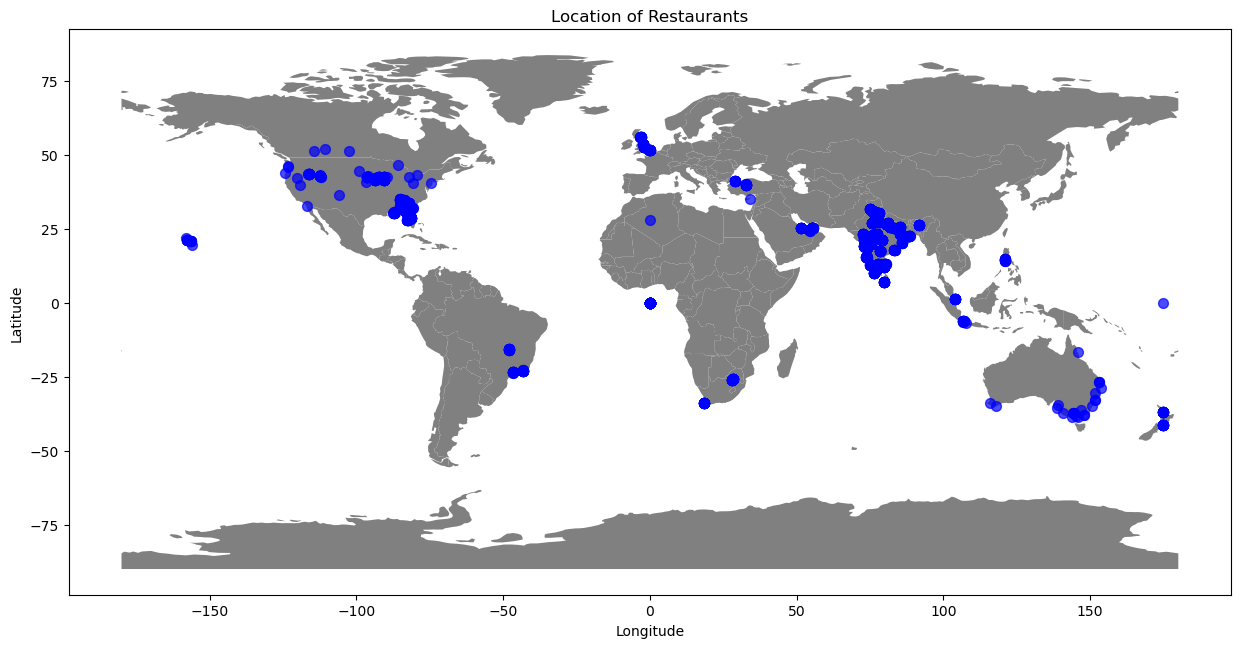

In [26]:
# plotting the locations of restaurants on the map

#loading a world map as background
world = gpd.read_file(r"C:\Users\Olaoluwa\Documents\Python data analysis\geospatial analysis\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")

#plotting the restaurants on the map

fig, ax = plt.subplots(figsize=(15, 10))   #setting the size and axis of the map
world.plot(ax=ax, color="grey")
gdf.plot(ax=ax, color="blue", markersize=50, alpha=0.7)  #plots the restaurants locations as blue dots

plt.title("Location of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [28]:
# Restaurant clusters

from sklearn.cluster import DBSCAN
import numpy as np

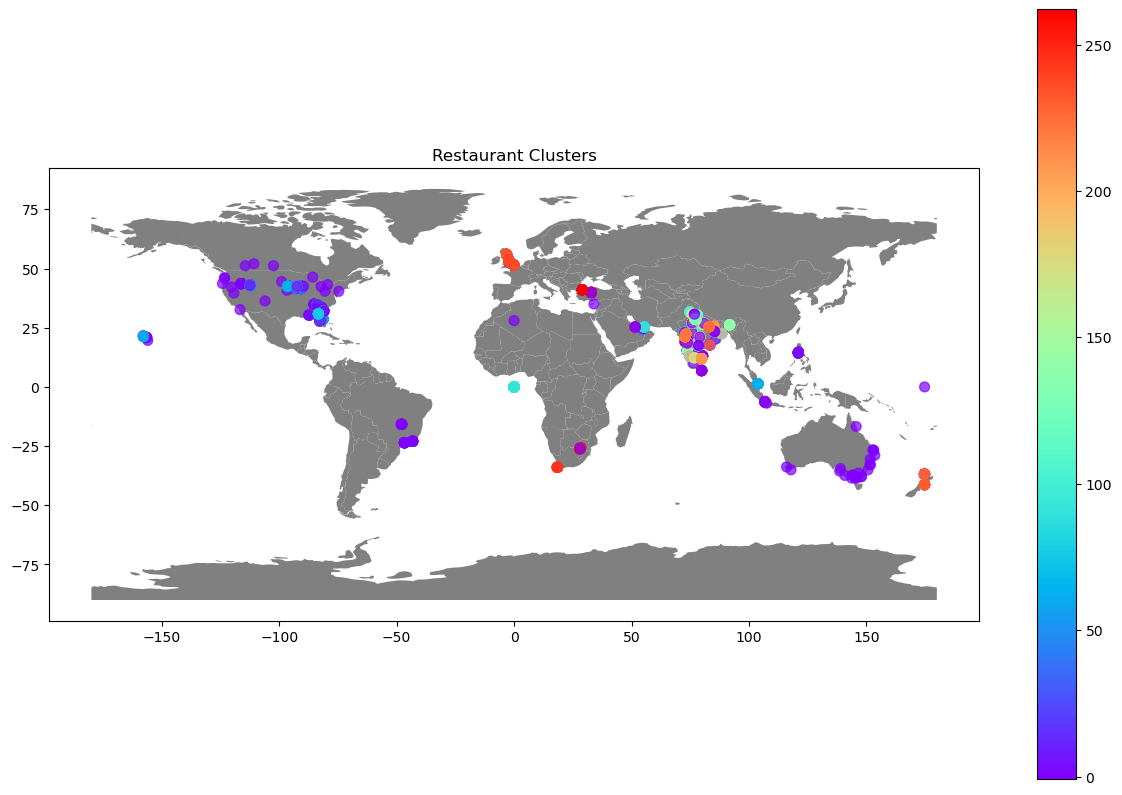

In [30]:
# first we convert the coordinates to a numpy array
coords = df[["Latitude", "Longitude"]].to_numpy()

# we use DBSCAN to group the restaurants into clusters, eps is the max distance between points to be considered in the
# same cluster, min_samples is the min restaurants required to form a cluster.
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(coords)

#assigns each restaurant to a cluster
df["cluster"] = dbscan.labels_

#plotting the clusters on a map
#cmap colours each cluster differently using a rainbow colourmap
#legend=True shows the cluster label, markersize determines the size of the cluster dots on the map, alpha determines
#the transparency of the cluster dots.

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="grey")
gdf.plot(ax=ax, column=df["cluster"], cmap="rainbow", markersize=50, alpha=0.7, legend=True)
plt.title("Restaurant Clusters")
plt.show()

## Task four

In [30]:
# identifying restaurant chains

name_count = df["Restaurant Name"].value_counts()
chains = name_count[name_count > 1]    # includes only chains

print("The dataset has the following restaurant chains:\n", chains)

The dataset has the following restaurant chains:
 Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: Restaurant Name, Length: 734, dtype: int64


In [50]:
# filtering the data to include only chain restaurants
# ensures that we only analyze restaurant chains and exclude independent restaurants

restaurant_chains = df[df["Restaurant Name"].isin(chains.index)]
restaurant_chains.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,cuisine_combo
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,"(Chinese,)"
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,No,No,No,No,3,4.9,Dark Green,Excellent,1070,"( Mexican, Filipino)"
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,No,No,No,No,3,4.8,Dark Green,Excellent,294,"( Mexican, Filipino)"
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,No,No,No,No,4,4.2,Green,Very Good,17,"(International,)"
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,No,No,No,No,4,4.9,Dark Green,Excellent,30,"(International,)"


In [39]:
# chains popularity

popular_chains = restaurant_chains["Restaurant Name"].value_counts()
popular_chains

Cafe Coffee Day        83
Domino's Pizza         79
Subway                 63
Green Chick Chop       51
McDonald's             48
                       ..
VadaPav 'n' Frankie     2
Bikaner Kesarvala       2
6 Pack Momos            2
The Mirch Masala        2
D�_vero��lu             2
Name: Restaurant Name, Length: 734, dtype: int64

In [40]:
# ratings of chains

avg_chain_rating = restaurant_chains.groupby("Restaurant Name")["Aggregate rating"].mean()
avg_chain_rating

Restaurant Name
10 Downing Street       4.000000
221 B Baker Street      3.366667
34 Parkstreet Lane      3.050000
34, Chowringhee Lane    2.791667
4700BC Popcorn          3.500000
                          ...   
Zaika                   2.850000
Zaika Kathi Rolls       1.500000
Zizo                    3.866667
Zooby's Kitchen         3.150000
bu��no                  3.750000
Name: Aggregate rating, Length: 734, dtype: float64

In [44]:
# putting popularity and rating into a dataframe to aid analysis

restaurant_chains_analysis = pd.DataFrame({"Popularity": popular_chains, "Rating": avg_chain_rating}).sort_values(by = "Popularity", ascending = False)
restaurant_chains_analysis

,Popularity,Rating
Cafe Coffee Day,83,2.419277
Domino's Pizza,79,2.740506
Subway,63,2.907937
Green Chick Chop,51,2.672549
McDonald's,48,3.339583
...,...,...
Gullu's,2,3.000000
Gulab,2,2.950000
Grover Sweets,2,1.550000
Grillz,2,2.350000


<Figure size 500x300 with 0 Axes>

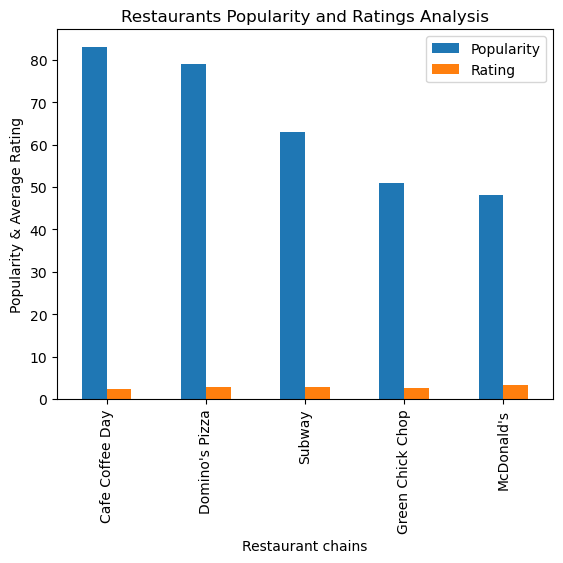

In [49]:
#visualizing the analysis

plt.figure(figsize = (5,3))
restaurant_chains_analysis.head().plot(kind = "bar")
plt.xlabel('Restaurant chains')
plt.ylabel('Popularity & Average Rating')
plt.title('Restaurants Popularity and Ratings Analysis')
plt.show()